## Importing required modules

In [2]:
import pandas as pd
import numpy as np

import plotly
import plotly.graph_objects as go

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


from datetime import datetime

In [3]:
mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows',500)
sns.set(style="darkgrid")

## Data Collection and Preparation

In [4]:
#data from "Data on COVID-19 (coronavirus) by Our World in Data" (https://github.com/owid/covid-19-data/tree/master/public/data/)
data_path="https://covid.ourworldindata.org/data/owid-covid-data.csv"
pd_raw = pd.read_csv(data_path)

In [5]:
pd_raw.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [6]:
#Checking Date and Time format
data=pd_raw.iloc[:,2:4] 
data.head()

,location,date
0,Afghanistan,2020-02-24
1,Afghanistan,2020-02-25
2,Afghanistan,2020-02-26
3,Afghanistan,2020-02-27
4,Afghanistan,2020-02-28


In [7]:
#Extracting required data from the dataset. 

#population
data=data.assign(population=pd_raw.iloc[:,48])

#Total Cases
data=data.assign(total_cases=pd_raw.iloc[:,4])

#Vaccination rate
data=data.assign(vaccination_rate=pd_raw.iloc[:,42])
data.head()

,location,date,population,total_cases,vaccination_rate
0,Afghanistan,2020-02-24,40099462.0,5.0,NaN
1,Afghanistan,2020-02-25,40099462.0,5.0,NaN
2,Afghanistan,2020-02-26,40099462.0,5.0,NaN
3,Afghanistan,2020-02-27,40099462.0,5.0,NaN
4,Afghanistan,2020-02-28,40099462.0,5.0,NaN


## Relative Cases

In [8]:
relative_cases=data.total_cases/data.population

In [9]:
#Assigning Relative cases to the data file

data=data.assign(relative_cases=relative_cases)
data.head()

,location,date,population,total_cases,vaccination_rate,relative_cases
0,Afghanistan,2020-02-24,40099462.0,5.0,NaN,1.246900e-07
1,Afghanistan,2020-02-25,40099462.0,5.0,NaN,1.246900e-07
2,Afghanistan,2020-02-26,40099462.0,5.0,NaN,1.246900e-07
3,Afghanistan,2020-02-27,40099462.0,5.0,NaN,1.246900e-07
4,Afghanistan,2020-02-28,40099462.0,5.0,NaN,1.246900e-07


In [11]:
#Extracting data for plotting the relative cases for 

plot_relativecases=data.pivot(index='date', columns='location', values='relative_cases')
plot_relativecases=plot_relativecases.reset_index().rename_axis(None, axis=1) #remove location index
plot_relativecases=plot_relativecases.filter(items=['date','India','Germany','Canada'], axis=1) #Filter only three country
plot_relativecases.to_csv('../data/processed/relative_cases.csv',index=False) #Creating .csv file of countries
plot_relativecases

,date,India,Germany,Canada
0,2020-01-01,NaN,NaN,NaN
1,2020-01-02,NaN,NaN,NaN
2,2020-01-03,NaN,NaN,NaN
3,2020-01-04,NaN,NaN,NaN
4,2020-01-05,NaN,NaN,NaN
...,...,...,...,...
926,2022-07-15,0.031068,0.355995,0.105466
927,2022-07-16,0.031082,0.355995,0.105518
928,2022-07-17,0.031095,0.355995,0.105518
929,2022-07-18,0.031106,0.357921,0.105519


## Figure 1 The relative cases overtime of Covid infectors (absolut Covid cases/population size)

In [12]:
fig = go.Figure()

## define how to plot the individual trace
country_list = ['Germany','India','Canada']
for each in country_list:
    fig.add_trace(go.Scatter(x = plot_relativecases.date,
                                 y=plot_relativecases[each],
                                 mode='markers+lines',
                                 marker_size=4,
                                 line_width=2,
                                 opacity=0.9,
                                 name=each
                        )
             )

## define the overall layout properties
fig.update_layout(
    width = 1200,
    height=1000,
    xaxis_title="Time",
    yaxis_title="The relative cases"
    
)

fig['layout']['yaxis'].update(autorange = True)     #Autoscale the figure
fig.update_yaxes(type="log",range=[1.1,5.5])

fig.update_layout(xaxis_rangeslider_visible=True)
fig.show(renderer='browser')


#figure1.savefig('../reports/figures/Figure1_RelativeCases_overTime.png')

## Default renderer fro Plotly

    Default renderer: 'notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

## Dash

In [14]:
import dash
from dash import dcc
from dash import html

app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    dcc.Dropdown(
        id='country_drop_down',
        options=[
            {'label': i, 'value': i} for i in country_list 
                ],
        value=['Germany', 'India'], #Pre-selected
        multi=True
    ),
    
    dcc.Graph(figure=fig, id = 'main_window_slope')
])

In [15]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')]
)
def update_figure(country_list):
    
    traces = []
    for each in country_list:
        traces.append(dict(x = plot_relativecases.date,
                                 y=plot_relativecases[each],
                                 mode='markers+lines',
                                 marker_size=4,
                                 line_width=2,
                                 opacity=0.9,
                                 name=each))
    return{
            'data': traces,
            'layout': dict(
                width = 1200,
                height=1000,
                xaxis_title="Time",
                yaxis_title="The relative cases"
           )
    }

In [16]:
app.run_server(debug=True, use_reloader=False)  #Turn off reloader if inside Jupyter

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


## The Vaccination rate

In [13]:
#Extracting data for vaccination rate

plot_vaccination_rate=data.pivot(index='date', columns='location', values='vaccination_rate')

plot_vaccination_rate=plot_vaccination_rate.reset_index().rename_axis(None, axis=1) #remove location index
plot_vaccination_rate=plot_vaccination_rate.filter(items=['date','India','Germany','Canada'], axis=1) #Filter only three country
plot_vaccination_rate.to_csv('C:/Users/prd2rt/Desktop/ads_covid-19-main/src/data/processed/vaccination_rate.csv',index=False) 
plot_vaccination_rate

,date,India,Germany,Canada
0,2020-01-01,NaN,NaN,NaN
1,2020-01-02,NaN,NaN,NaN
2,2020-01-03,NaN,NaN,NaN
3,2020-01-04,NaN,NaN,NaN
4,2020-01-05,NaN,NaN,NaN
...,...,...,...,...
926,2022-07-15,65.74,75.98,82.49
927,2022-07-16,NaN,75.98,NaN
928,2022-07-17,NaN,75.98,NaN
929,2022-07-18,65.81,75.98,NaN


## Figure 2 The vaccination rate (percentage of the population) over time

<Figure size 1152x648 with 0 Axes>

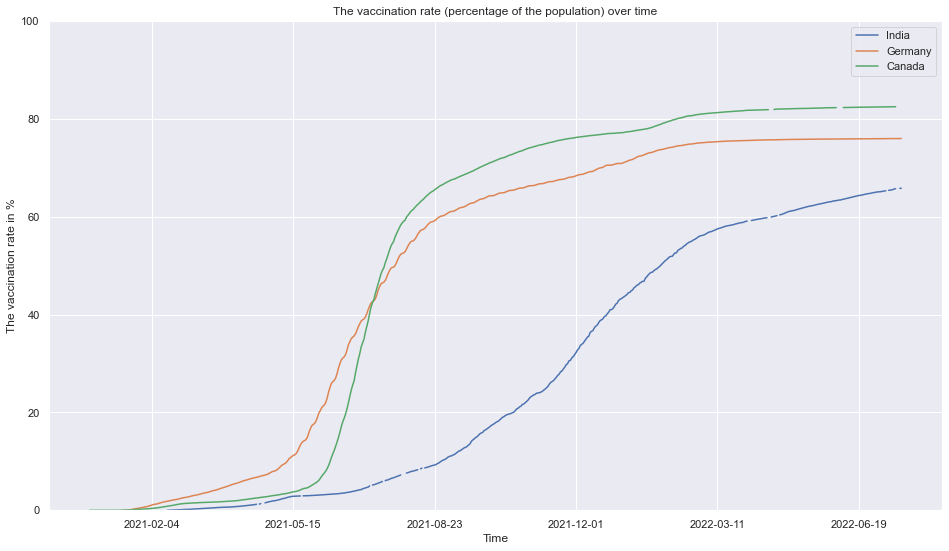

In [14]:
plt.figure();
bx=plot_vaccination_rate.set_index('date').plot()

plt.xlabel("Time")
plt.ylabel("The vaccination rate in %")
plt.ylim(0,100)
plt.title("The vaccination rate (percentage of the population) over time")


figure2 = bx.get_figure()
figure2.savefig('../reports/figures/Figure2_VaccinationRate_overTime.png')